In [99]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [62]:
data=pd.read_csv("std_grd.csv")
data

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [21]:
df=pd.DataFrame(data=data)

In [57]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA,H-121
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,2,0,8,3,2,2.205,5
1,1,0,9,10,9,5,6,9,0,10,...,9,6,9,2,5,6,6,3,2.008,0
2,2,0,3,0,5,4,0,5,4,2,...,3,0,6,0,0,0,2,0,3.608,0
3,3,9,7,10,9,9,2,10,8,9,...,6,10,8,5,3,7,7,7,1.906,9
4,4,2,2,2,4,0,0,2,4,0,...,4,4,5,2,0,2,2,0,3.448,2


In [58]:
df.tail()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA,H-121
566,566,3,0,0,2,1,0,2,2,1,...,2,0,0,0,4,4,3,0,3.798,3
567,567,1,0,0,0,0,0,0,2,0,...,4,0,0,2,3,2,6,2,3.772,1
568,568,3,0,2,4,0,0,0,0,0,...,3,0,4,0,6,4,2,2,3.470,3
569,569,0,4,9,0,9,10,5,8,5,...,3,3,8,9,6,3,5,6,2.193,0
570,570,6,9,9,6,6,10,3,7,6,...,6,5,9,11,8,4,9,8,1.753,6


In [59]:
df.sample()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA,H-121
478,478,4,8,2,0,3,2,3,0,5,...,5,0,6,7,5,4,3,7,2.779,4


In [65]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA', 'H-121'],
      dtype='object')

In [24]:
le=LabelEncoder()

In [26]:
df['H-121']=le.fit_transform(df['PH-121'])

In [27]:
df['HS-101']=le.fit_transform(df['HS-101'])

In [29]:
df['CY-105']=le.fit_transform(df['CY-105'])

In [30]:
df['HS-105/12']=le.fit_transform(df['HS-105/12'])

In [32]:
df['MT-111']=le.fit_transform(df['MT-111'])

In [35]:
df["PH-121"]=le.fit_transform(df['PH-121'])

In [52]:
df["CS-105"]=le.fit_transform(df['CS-105'])
df["CS-106"]=le.fit_transform(df['CS-106'])
df["EL-102"]=le.fit_transform(df['EL-102'])
df["EE-119"]=le.fit_transform(df['EE-119'])
df["ME-107"]=le.fit_transform(df['ME-107'])
df["CS-107"]=le.fit_transform(df['CS-107'])
df["HS-205/20"]=le.fit_transform(df['HS-205/20'])
df["EE-222"]=le.fit_transform(df['EE-222'])
df["MT-224"]=le.fit_transform(df['MT-224'])
df["CS-210"]=le.fit_transform(df['CS-210'])
df["CS-211"]=le.fit_transform(df['CS-211'])
df["CS-203"]=le.fit_transform(df['CS-203'])
df["CS-214"]=le.fit_transform(df['CS-214'])
df["EE-217"]=le.fit_transform(df['EE-217'])
df["CS-212"]=le.fit_transform(df['CS-212'])
df["CS-215"]=le.fit_transform(df['CS-215'])
df["MT-331"]=le.fit_transform(df['MT-331'])
df["EF-303"]=le.fit_transform(df['EF-303'])
df["HS-304"]=le.fit_transform(df['HS-304'])
df["CS-301"]=le.fit_transform(df['CS-301'])
df["CS-302"]=le.fit_transform(df['CS-302'])
df["TC-383"]=le.fit_transform(df['TC-383'])
df["MT-442"]=le.fit_transform(df['MT-442'])
df["EL-332"]=le.fit_transform(df['EL-332'])
df["CS-318"]=le.fit_transform(df['CS-318'])
df["CS-306"]=le.fit_transform(df['CS-306'])
df["CS-312"]=le.fit_transform(df['CS-312'])
df["CS-317"]=le.fit_transform(df['CS-317'])
df["CS-403"]=le.fit_transform(df['CS-403'])
df["CS-421"]=le.fit_transform(df['CS-421'])
df["CS-406"]=le.fit_transform(df['CS-406'])
df["CS-414"]=le.fit_transform(df['CS-414'])
df["CS-419"]=le.fit_transform(df['CS-419'])
df["CS-423"]=le.fit_transform(df['CS-423'])
df["CS-412"]=le.fit_transform(df['CS-412'])
df["MT-222"]=le.fit_transform(df['MT-222'])
df["Seat No."]=le.fit_transform(df['Seat No.'])


In [76]:
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,1,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,2,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,3,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,0,2,1,0,2,2,1,...,2,2,0,0,0,4,4,3,0,3.798
567,567,1,0,0,0,0,0,0,2,0,...,4,4,0,0,2,3,2,6,2,3.772
568,568,3,0,2,4,0,0,0,0,0,...,2,3,0,4,0,6,4,2,2,3.470
569,569,0,4,9,0,9,10,5,8,5,...,9,3,3,8,9,6,3,5,6,2.193


In [77]:
df.dtypes

Seat No.       int32
PH-121         int64
HS-101         int32
CY-105         int32
HS-105/12      int32
MT-111         int32
CS-105         int64
CS-106         int64
EL-102         int64
EE-119         int64
ME-107         int64
CS-107         int64
HS-205/20      int64
MT-222         int64
EE-222         int64
MT-224         int64
CS-210         int64
CS-211         int64
CS-203         int64
CS-214         int64
EE-217         int64
CS-212         int64
CS-215         int64
MT-331         int64
EF-303         int64
HS-304         int64
CS-301         int64
CS-302         int64
TC-383         int64
MT-442         int64
EL-332         int64
CS-318         int64
CS-306         int64
CS-312         int64
CS-317         int64
CS-403         int64
CS-421         int64
CS-406         int64
CS-414         int64
CS-419         int64
CS-423         int64
CS-412         int64
CGPA         float64
dtype: object

In [78]:
df.shape

(571, 43)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    int32  
 1   PH-121     571 non-null    int64  
 2   HS-101     571 non-null    int32  
 3   CY-105     571 non-null    int32  
 4   HS-105/12  571 non-null    int32  
 5   MT-111     571 non-null    int32  
 6   CS-105     571 non-null    int64  
 7   CS-106     571 non-null    int64  
 8   EL-102     571 non-null    int64  
 9   EE-119     571 non-null    int64  
 10  ME-107     571 non-null    int64  
 11  CS-107     571 non-null    int64  
 12  HS-205/20  571 non-null    int64  
 13  MT-222     571 non-null    int64  
 14  EE-222     571 non-null    int64  
 15  MT-224     571 non-null    int64  
 16  CS-210     571 non-null    int64  
 17  CS-211     571 non-null    int64  
 18  CS-203     571 non-null    int64  
 19  CS-214     571 non-null    int64  
 20  EE-217    

In [80]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

<AxesSubplot:>

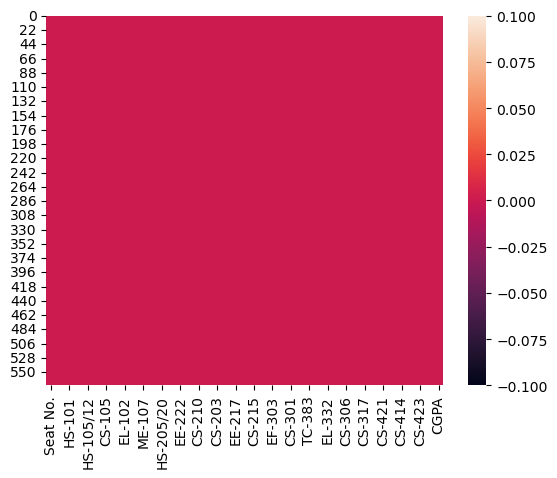

In [81]:
sns.heatmap(df.isnull())

In [82]:
df.describe()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,285.000000,3.781086,5.071804,2.921191,4.264448,3.935201,2.838879,4.161121,3.998249,3.921191,...,4.299475,4.982487,3.663748,5.595447,4.770578,2.693520,4.084063,4.211909,4.570928,2.954888
std,164.977776,3.046895,2.785317,2.992228,3.216478,3.034481,2.696709,2.774311,3.075939,2.698100,...,3.580108,2.927134,3.128656,2.916243,4.565881,2.931189,2.656988,3.040475,4.085464,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,142.500000,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,285.000000,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000,...,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,427.500000,6.000000,7.000000,5.000000,7.000000,6.000000,4.000000,6.000000,6.000000,6.000000,...,7.000000,7.000000,6.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,3.451000
max,570.000000,12.000000,11.000000,13.000000,13.000000,13.000000,10.000000,13.000000,13.000000,12.000000,...,14.000000,12.000000,11.000000,13.000000,14.000000,13.000000,12.000000,12.000000,13.000000,3.985000


key observations-

1- No skewness in datasets as mean is not more then median(50%).

2- outliers are present in data(df) as there is difference in 75% and max in 1 column

In [83]:
df.skew()

Seat No.     0.000000
PH-121       0.549104
HS-101       0.053303
CY-105       1.001752
HS-105/12    0.337649
MT-111       0.520916
CS-105       0.930769
CS-106       0.682923
EL-102       0.532311
EE-119       0.607213
ME-107       0.131791
CS-107       0.456184
HS-205/20    1.155648
MT-222       0.267531
EE-222       0.864582
MT-224       0.566537
CS-210       0.966469
CS-211       0.202623
CS-203       0.337821
CS-214       0.120394
EE-217       0.876835
CS-212       0.459739
CS-215       0.288215
MT-331       0.674150
EF-303       0.547945
HS-304       0.814333
CS-301       0.489045
CS-302       0.697409
TC-383       0.379712
MT-442       0.970582
EL-332       0.587335
CS-318       0.511718
CS-306       0.575364
CS-312       0.561465
CS-317       0.273812
CS-403       0.638689
CS-421       0.317459
CS-406       1.105583
CS-414       1.592209
CS-419       0.773674
CS-423       0.627219
CS-412       1.086028
CGPA        -0.497203
dtype: float64

Seat No.        AxesSubplot(0.125,0.53;0.0295802x0.35)
PH-121       AxesSubplot(0.160496,0.53;0.0295802x0.35)
HS-101       AxesSubplot(0.195992,0.53;0.0295802x0.35)
CY-105       AxesSubplot(0.231489,0.53;0.0295802x0.35)
HS-105/12    AxesSubplot(0.266985,0.53;0.0295802x0.35)
MT-111       AxesSubplot(0.302481,0.53;0.0295802x0.35)
CS-105       AxesSubplot(0.337977,0.53;0.0295802x0.35)
CS-106       AxesSubplot(0.373473,0.53;0.0295802x0.35)
EL-102       AxesSubplot(0.408969,0.53;0.0295802x0.35)
EE-119       AxesSubplot(0.444466,0.53;0.0295802x0.35)
ME-107       AxesSubplot(0.479962,0.53;0.0295802x0.35)
CS-107       AxesSubplot(0.515458,0.53;0.0295802x0.35)
HS-205/20    AxesSubplot(0.550954,0.53;0.0295802x0.35)
MT-222        AxesSubplot(0.58645,0.53;0.0295802x0.35)
EE-222       AxesSubplot(0.621947,0.53;0.0295802x0.35)
MT-224       AxesSubplot(0.657443,0.53;0.0295802x0.35)
CS-210       AxesSubplot(0.692939,0.53;0.0295802x0.35)
CS-211       AxesSubplot(0.728435,0.53;0.0295802x0.35)
CS-203    

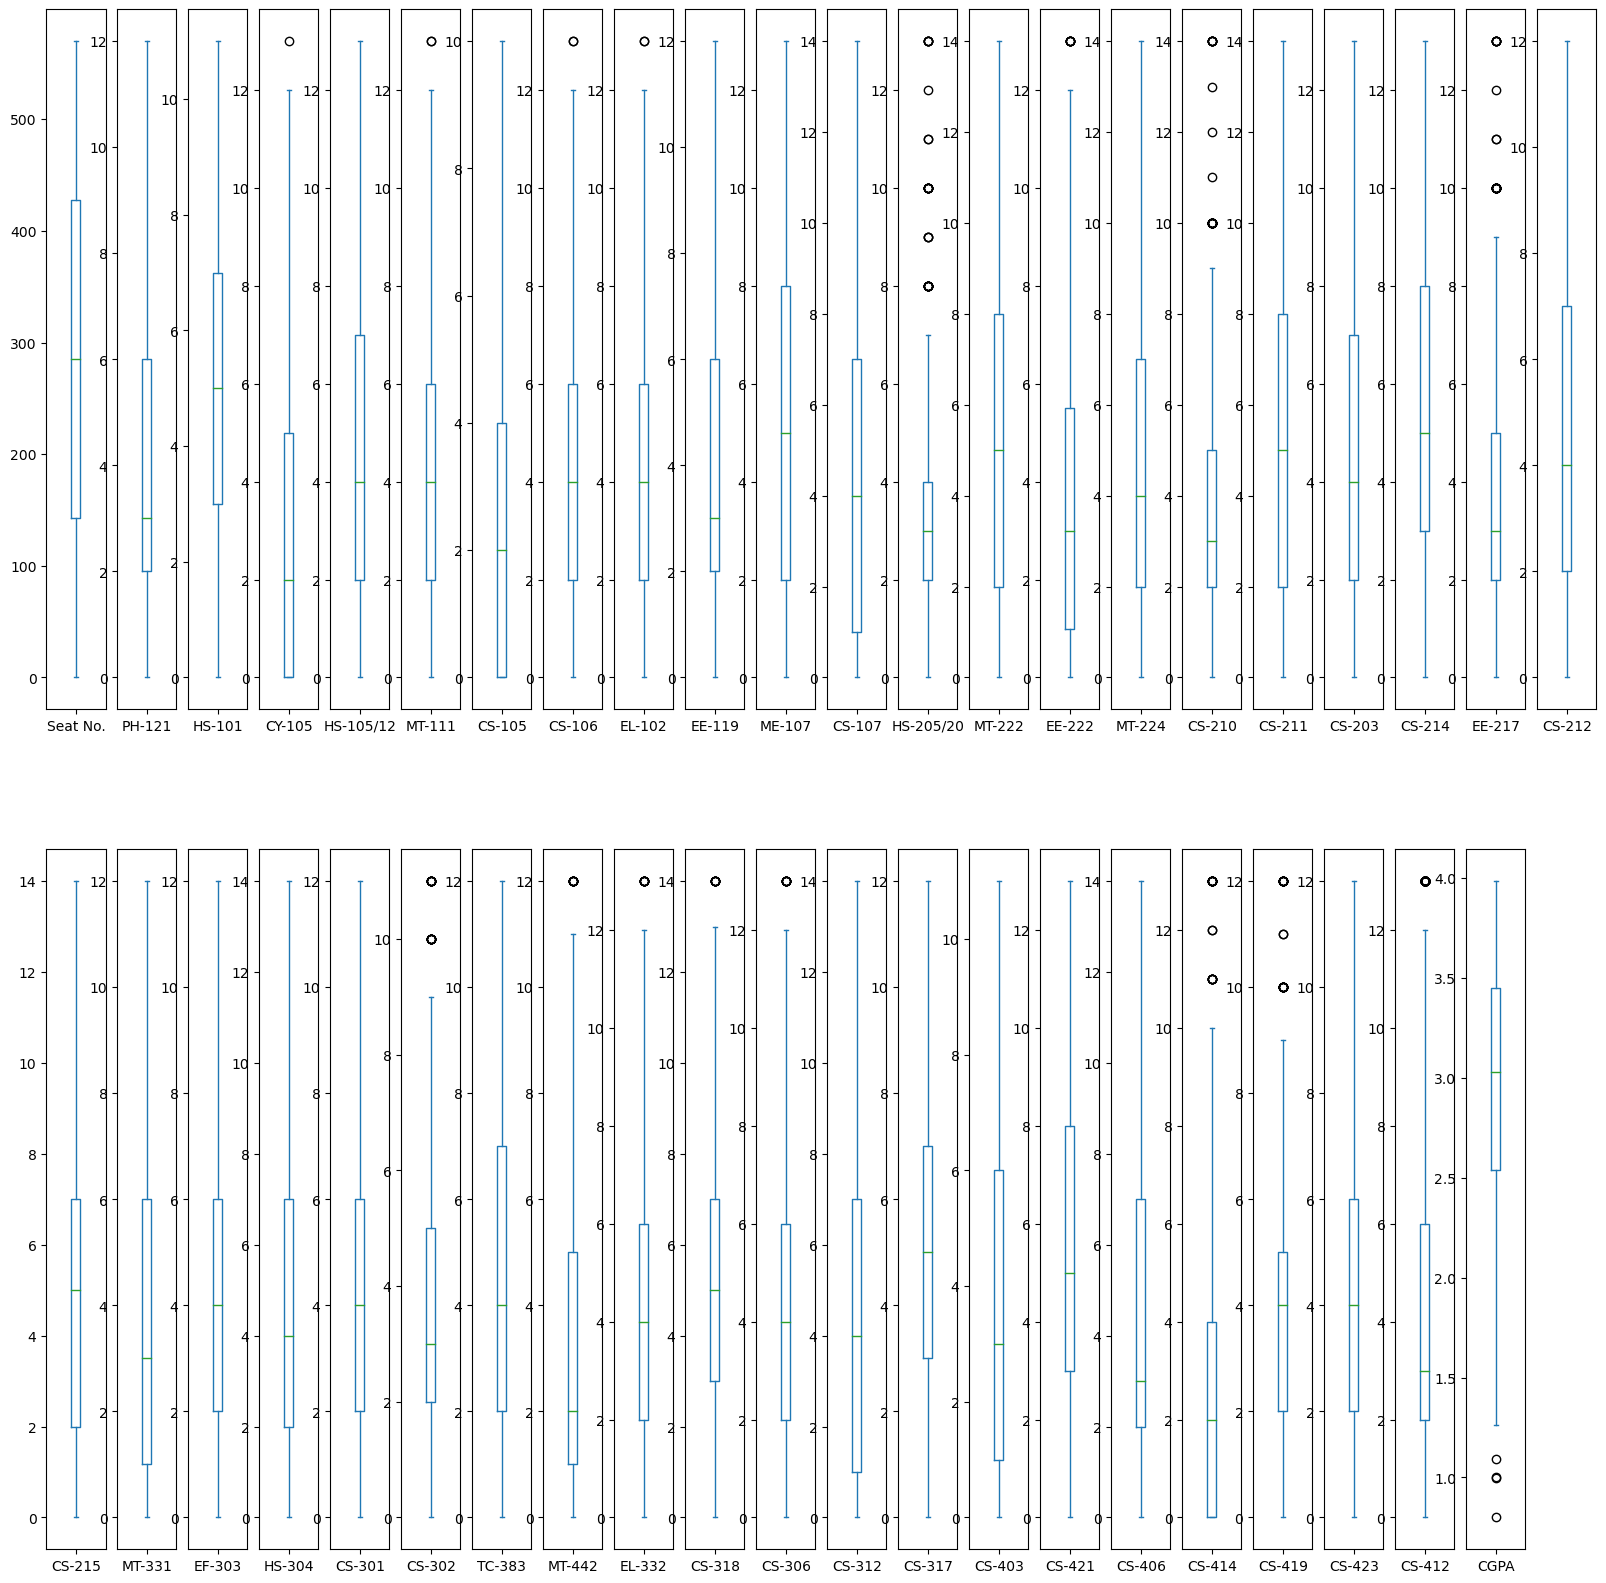

In [87]:
df.plot(kind="box",subplots=True,figsize=(20,20),layout=(2,22))

from the above analysis we get to know that there are outliers present in dataset

Removing outliers

In [88]:
from scipy.stats import zscore

In [89]:
z=np.abs(zscore(df))

In [90]:
z

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,1.729020,0.400402,1.770900,1.698822,0.540054,1.340711,2.657832,1.745703,1.302126,0.400191,...,1.034541,1.031780,1.387194,0.825261,0.607332,0.919723,1.475118,0.398941,0.629839,1.209480
1,1.722953,1.242052,1.411559,2.367806,1.473569,0.351207,1.173242,1.745703,1.300986,2.254972,...,1.593674,1.373711,0.747382,1.168469,0.607332,0.787565,0.721726,0.588612,0.384854,1.527217
2,1.716887,1.242052,0.744483,0.977116,0.228883,0.021373,1.053643,0.302639,0.000570,0.712678,...,0.363289,0.677873,1.172056,0.138846,1.045748,0.919723,1.538450,0.728126,1.119808,1.053392
3,1.710820,1.714365,0.692879,2.367806,1.473569,1.670546,0.311348,2.106468,1.302126,1.884016,...,1.593674,0.347919,2.027007,0.825261,0.050291,0.104650,1.098422,0.917796,0.595086,1.691731
4,1.704753,0.585070,1.103823,0.308131,0.082289,1.297966,1.053643,0.779659,0.000570,1.454590,...,0.195843,0.335942,0.107569,0.204362,0.607332,0.919723,0.785058,0.728126,1.119808,0.795331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,1.704753,0.256579,1.822504,0.977116,0.704632,0.968131,1.053643,0.779659,0.650208,1.083634,...,0.642855,1.019804,1.172056,1.920400,1.045748,0.446107,0.031666,0.398941,1.119808,1.359839
567,1.710820,0.913561,1.822504,0.977116,1.326975,1.297966,1.053643,1.501191,0.650208,1.454590,...,0.083723,0.335942,1.172056,1.920400,0.607332,0.104650,0.785058,0.588612,0.629839,1.317904
568,1.716887,0.256579,1.822504,0.308131,0.082289,1.297966,1.053643,1.501191,1.300986,1.454590,...,0.642855,0.677873,1.172056,0.547570,1.045748,1.129023,0.031666,0.728126,0.629839,0.830814
569,1.722953,1.242052,0.385142,2.033314,1.326975,1.670546,2.657832,0.302639,1.302126,0.400191,...,1.314107,0.677873,0.212337,0.825261,0.927122,1.129023,0.408362,0.259427,0.350101,1.228834


In [91]:
Threshold=3
print(np.where(z>3))

(array([ 44,  44,  44,  44,  44,  44,  44,  44,  60,  60,  60,  60,  60,
        60,  86,  91,  91,  91, 137, 137, 137, 137, 137, 137, 137, 142,
       142, 142, 142, 142, 142, 143, 143, 143, 143, 143, 143, 143, 143,
       281, 281, 281, 281, 281, 282, 282, 288, 288, 288, 288, 288, 288,
       288, 423, 424, 481, 543, 565, 565, 565, 565, 565, 565, 565],
      dtype=int64), array([ 3,  7, 12, 14, 16, 20, 25, 38,  3, 12, 14, 16, 25, 38, 38, 16, 25,
       38,  3, 12, 14, 16, 20, 25, 38, 12, 14, 16, 20, 25, 38,  3, 12, 14,
       16, 20, 25, 38, 42,  7, 12, 25, 38, 42, 25, 38, 12, 14, 16, 20, 25,
       38, 42, 38, 38, 38, 38, 12, 14, 16, 20, 25, 38, 42], dtype=int64))


In [93]:
df_new=df[(z<3).all(axis=1)]
df_new

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,0,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,1,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,2,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,3,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,4,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,0,2,1,0,2,2,1,...,2,2,0,0,0,4,4,3,0,3.798
567,567,1,0,0,0,0,0,0,2,0,...,4,4,0,0,2,3,2,6,2,3.772
568,568,3,0,2,4,0,0,0,0,0,...,2,3,0,4,0,6,4,2,2,3.470
569,569,0,4,9,0,9,10,5,8,5,...,9,3,3,8,9,6,3,5,6,2.193


In [94]:
df=df_new

In [96]:
df.shape

(556, 43)

In [112]:
x=df.iloc[:,0:-1]
x

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,0,5,10,8,6,8,10,9,8,5,...,6,8,8,8,8,2,0,8,3,2
1,1,0,9,10,9,5,6,9,0,10,...,9,10,9,6,9,2,5,6,6,3
2,2,0,3,0,5,4,0,5,4,2,...,2,3,3,0,6,0,0,0,2,0
3,3,9,7,10,9,9,2,10,8,9,...,8,10,6,10,8,5,3,7,7,7
4,4,2,2,2,4,0,0,2,4,0,...,2,5,4,4,5,2,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,566,3,0,0,2,1,0,2,2,1,...,4,2,2,0,0,0,4,4,3,0
567,567,1,0,0,0,0,0,0,2,0,...,2,4,4,0,0,2,3,2,6,2
568,568,3,0,2,4,0,0,0,0,0,...,4,2,3,0,4,0,6,4,2,2
569,569,0,4,9,0,9,10,5,8,5,...,4,9,3,3,8,9,6,3,5,6


In [98]:
x.shape

(556, 42)

In [100]:
y=df.iloc[:,-1]

In [101]:
y.shape

(556,)

In [102]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=48)

In [103]:
xtrain.shape

(389, 42)

In [104]:
ytrain.shape

(389,)

In [105]:
lg=LinearRegression()

In [106]:
lg

LinearRegression()

In [107]:
lg.fit(xtrain,ytrain)

LinearRegression()

In [108]:
lg.score(xtrain,ytrain)

0.9900004420908992

In [109]:
pred=lg.predict(xtest)

In [111]:
print("error")
print("Mean squared error = ",mean_squared_error(ytest,pred))
print("Mean absolute error = ",mean_absolute_error(ytest,pred))
print("Root mean squared error = ",np.sqrt(mean_squared_error(ytest,pred)))

error
Mean squared error =  0.004010548787707663
Mean absolute error =  0.050231431328746884
Root mean squared error =  0.06332889378244075


In [121]:
p=np.array([2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5,5,5,6,6,7,8,9,5,7,8,5,8,9,2,5])

In [122]:
p.shape

(42,)

In [123]:
p1=p.reshape(1,-1)

In [124]:
p1.shape

(1, 42)

In [125]:
lg.predict(p1)

array([2.76539534])

The model is predicting the right CGPA of student
hence is working fine